# Imports and Load Data

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from shapely import wkt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from shapely.geometry import Point

import contextily as ctx
from haversine import haversine_vector, Unit
import geopandas as gpd

In [2]:
data = pd.read_csv("../data/analytics_trip_data_clustering.csv")

# Further Data Preparation and Cleaning

In [3]:
#Further settings for displaying results
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data.describe()

trip_seconds    trip_miles  pickup_census_tract  dropoff_census_tract  \
count  1.456203e+07  1.456203e+07         1.456203e+07          1.456203e+07   
mean   8.885241e+02  4.092234e+00         1.703138e+10          1.703134e+10   
std    7.941427e+02  5.353668e+00         3.389367e+05          3.220047e+05   
min    6.100000e+01  1.600000e-01         1.703101e+10          1.703101e+10   
25%    4.030000e+02  1.000000e+00         1.703108e+10          1.703108e+10   
50%    6.030000e+02  1.700000e+00         1.703128e+10          1.703124e+10   
75%    1.026000e+03  4.000000e+00         1.703183e+10          1.703183e+10   
max    7.199000e+03  4.993000e+01         1.703198e+10          1.703198e+10   

       pickup_community_area  dropoff_community_area          fare  \
count           1.456157e+07            1.450446e+07  1.456203e+07   
mean            2.536240e+01            2.222967e+01  1.425125e+01   
std             1.981870e+01            1.724037e+01  1.988032e+01   
min             1.000000e+00            1.000000e+00  0.000000e+00   
25%             8.000000e+00            8.000000e+00  6.500000e+00   
50%             2.800000e+01            2.400000e+01  8.500000e+00   
75%             3.200000e+01            3.200000e+01  1.500000e+01   
max             7.700000e+01            7.700000e+01  9.250000e+03   

               tips       tolls        extras    trip_total  price_per_mile  \
count  1.456203e+07  11550213.0  1.456203e+07  1.456203e+07    1.456160e+07   
mean   1.844400e+00         0.0  8.380897e-01  1.707727e+01    1.460164e+01   
std    2.895430e+00         0.0  9.218098e+00  2.370150e+01    2.145791e+01   
min    0.000000e+00         0.0  0.000000e+00  0.000000e+00    1.000000e-02   
25%    0.000000e+00         0.0  0.000000e+00  7.750000e+00    7.000000e+00   
50%    0.000000e+00         0.0  0.000000e+00  1.050000e+01    9.000000e+00   
75%    2.400000e+00         0.0  1.000000e+00  1.725000e+01    1.500000e+01   
max    8.000000e+02         0.0  9.832430e+03  9.871430e+03    1.333757e+04   

       miles_per_hour   temperature  precipitation  sports_event_h3  \
count    1.456203e+07  1.456203e+07   1.456203e+07     1.456203e+07   
mean     1.377499e+01  1.209902e+01   2.732992e-03     7.379467e-04   
std      8.358539e+00  1.179423e+01   2.687785e-02     2.715515e-02   
min      1.000215e+00 -2.277778e+01   0.000000e+00     0.000000e+00   
25%      8.250000e+00  2.222222e+00   0.000000e+00     0.000000e+00   
50%      1.109589e+01  1.055556e+01   0.000000e+00     0.000000e+00   
75%      1.666667e+01  2.277778e+01   0.000000e+00     0.000000e+00   
max      5.000000e+01  3.555556e+01   1.100000e+00     1.000000e+00   

       sports_event_census_tract  poi_h3_res_8  poi_h3_res_7  poi_h3_res_6  \
count               1.456203e+07  1.456203e+07  1.456203e+07  1.456203e+07   
mean                5.109178e-04  7.247800e+01  3.293327e+02  7.209643e+02   
std                 2.259772e-02  4.839214e+01  1.867155e+02  2.802257e+02   
min                 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%                 0.000000e+00  2.800000e+01  1.810000e+02  6.280000e+02   
50%                 0.000000e+00  8.100000e+01  3.450000e+02  8.720000e+02   
75%                 0.000000e+00  1.240000e+02  5.120000e+02  8.720000e+02   
max                 1.000000e+00  1.510000e+02  5.120000e+02  8.720000e+02   

       poi_h3_res_4  poi_census_tract  
count  1.456203e+07      1.456203e+07  
mean   3.210804e+03      5.698853e+01  
std    9.210893e+02      4.869259e+01  
min    9.000000e+00      0.000000e+00  
25%    3.481000e+03      2.000000e+01  
50%    3.481000e+03      4.900000e+01  
75%    3.481000e+03      7.000000e+01  
max    3.481000e+03      1.620000e+02

In [5]:
# Check for NaN values
nan_info = data.isna().sum()
print(nan_info)

trip_id                            0
taxi_id                          339
trip_start_timestamp               0
trip_end_timestamp                 0
trip_seconds                       0
trip_miles                         0
pickup_census_tract                0
dropoff_census_tract               0
pickup_community_area            460
dropoff_community_area         57568
fare                               0
tips                               0
tolls                        3011815
extras                             0
trip_total                         0
payment_type                       0
company                            0
pickup_centroid_location           0
dropoff_centroid_location          0
h3_res_4_pickup                    0
h3_res_6_pickup                    0
h3_res_7_pickup                    0
h3_res_8_pickup                    0
h3_res_9_pickup                    0
h3_res_4_dropoff                   0
h3_res_6_dropoff                   0
h3_res_7_dropoff                   0
h

Column tolls seems to be useless, as many entries are zero, so we drop it. We also have some values that are missing in price_per_mile, which we also want to drop.

In [6]:
data.drop(columns=['tolls'], inplace=True)
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14503237 entries, 0 to 14562027
Data columns (total 42 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   trip_id                    object 
 1   taxi_id                    object 
 2   trip_start_timestamp       object 
 3   trip_end_timestamp         object 
 4   trip_seconds               float64
 5   trip_miles                 float64
 6   pickup_census_tract        int64  
 7   dropoff_census_tract       int64  
 8   pickup_community_area      float64
 9   dropoff_community_area     float64
 10  fare                       float64
 11  tips                       float64
 12  extras                     float64
 13  trip_total                 float64
 14  payment_type               object 
 15  company                    object 
 16  pickup_centroid_location   object 
 17  dropoff_centroid_location  object 
 18  h3_res_4_pickup            object 
 19  h3_res_6_pickup            object 
 20  h3_re

In [8]:
data.head(1)

trip_id  \
0  ac1fae1544d7804f13fbf657cb058ba91a983fea   

                                                                                                                            taxi_id  \
0  847cf962bd6f62040673e6c24c24940aeb2d7fdaa54677eed6a0aaa4aeef61984916b32d763b4baa6c32476531543bb77e2346cd64f505618f6b9d562243f950   

  trip_start_timestamp   trip_end_timestamp  trip_seconds  trip_miles  \
0  2018-01-01 00:15:00  2018-01-01 00:30:00         960.0         2.6   

   pickup_census_tract  dropoff_census_tract  pickup_community_area  \
0          17031071500           17031080100                    7.0   

   dropoff_community_area  fare  tips  extras  trip_total payment_type  \
0                     8.0  11.0   0.0     0.0        11.0         Cash   

                     company              pickup_centroid_location  \
0  Taxi Affiliation Services  POINT (-87.6317173661 41.9146162864)   

                  dropoff_centroid_location  h3_res_4_pickup  h3_res_6_pickup  \
0  POINT (-87.6266589003 41.90752007470001)  842664dffffffff  862664c17ffffff   

   h3_res_7_pickup  h3_res_8_pickup  h3_res_9_pickup h3_res_4_dropoff  \
0  872664c11ffffff  882664c115fffff  892664c114fffff  842664dffffffff   

  h3_res_6_dropoff h3_res_7_dropoff h3_res_8_dropoff h3_res_9_dropoff  \
0  862664c17ffffff  872664c11ffffff  882664c117fffff  892664c116fffff   

  trip_middle_timestamp  price_per_mile  miles_per_hour                 date  \
0   2018-01-01 00:22:30            11.0            9.75  2018-01-01 01:53:00   

   temperature  precipitation             Game_End  sports_event_h3  \
0   -18.333333            0.0  2018-01-01 00:00:00              0.0   

   sports_event_census_tract  poi_h3_res_8  poi_h3_res_7  poi_h3_res_6  \
0                        0.0           5.0           3.0         628.0   

   poi_h3_res_4  poi_census_tract  
0          3481              16.0

## Adding new Features

### Time Features

In [9]:
data['trip_start_timestamp'] = pd.to_datetime(data['trip_start_timestamp'])
data['hour'] = data['trip_start_timestamp'].dt.hour
data['weekday'] = data['trip_start_timestamp'].dt.weekday
data['month'] = data['trip_start_timestamp'].dt.month

### Sports Data Features

To enhance our analysis, it might be valuable to further differentiate taxi rides based on whether they start at a sports location.

In [10]:
data['pick_from_sport'] = ((data['sports_event_h3'] != 0) | (data['sports_event_census_tract'] != 0)).astype(int)

### POI Data Features

To differentiate between taxi rides that originate from points of interest (POIs) and those that do not, we create a binary dummy variable.

In [11]:
data['pick_from_poi'] = ((data['poi_h3_res_8'] != 0) | (data['poi_census_tract'] != 0)).astype(int)

In [12]:
print(data['pick_from_sport'].sum())
print(data['pick_from_poi'].sum())
print(data['poi_h3_res_8'].describe())

12098
14468644
count    1.450324e+07
mean     7.256058e+01
std      4.844570e+01
min      0.000000e+00
25%      2.800000e+01
50%      8.100000e+01
75%      1.240000e+02
max      1.510000e+02
Name: poi_h3_res_8, dtype: float64


Including sports event data does not seem to make much sense, as too few cab journeys can be linked to sports events. With the POI data it seems to be different, almost all trips can be linked to H3 data with Resolution 8. However, this results in another problem, as there are more POIs in a polygon at resolution 8. It becomes challenging to determine definitively whether a given taxi journey is directed towards a specific POI or merely passing through an area with several POIs. For this type of an analysis a more granular resolution would have been needed which in our case was limited due to computational resources.

### Distance to city Center

Separating taxi journeys based on their distance from the city center can provide valuable insights into different journey types and patterns. These distinct categories of journeys may be identified:

   - **City Center to City Center**: Trips that start and end within the city
   - **Out-of-Town to City Center**: Trips that start outside the city center but end within it.
   - **City Center to Out-of-Town**: Trips that start within the city center but end outside it.
   - **Out-of-Town to Out-of-Town**: Trips that neither start nor end within the city center.
   
To measure distances between two geographical points, the Haversine distance is used. Documentation of it can be found [here](https://pypi.org/project/haversine/).


In [16]:
# Chicago Center
chicago_coords = (41.8781, -87.6298)

# Extract lat and long for later use
data[['pickup_longitude', 'pickup_latitude']] = data['pickup_centroid_location'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').astype(float)
data[['dropoff_longitude', 'dropoff_latitude']] = data['dropoff_centroid_location'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)').astype(float)

pickup_coords = data[['pickup_latitude', 'pickup_longitude']].values
dropoff_coords = data[['dropoff_latitude', 'dropoff_longitude']].values

chicago_coords_array = np.array([chicago_coords] * len(data))

data['distance_to_chicago'] = haversine_vector(pickup_coords, chicago_coords_array, Unit.MILES)

data['distance_from_chicago'] = haversine_vector(dropoff_coords, chicago_coords_array, Unit.MILES)

data.head(5)

trip_id  \
0  ac1fae1544d7804f13fbf657cb058ba91a983fea   
1  31c416218f80ee2e585777bb475243b971504afc   
2  b0a993338c200b1a3fea0d5602717c61c6b09eef   
3  f93672d654d2821cfcc49150ff961a8fe281e61d   
4  1ffa4782096d433dc69fccbbc84326c442644e73   

                                                                                                                            taxi_id  \
0  847cf962bd6f62040673e6c24c24940aeb2d7fdaa54677eed6a0aaa4aeef61984916b32d763b4baa6c32476531543bb77e2346cd64f505618f6b9d562243f950   
1  034ec4437f304cffcd4acf850106574343e69d3c5424acf731dde18d71dfa6b7bee628971b809ce4742206f67324fb038e44f9dd135f3ee8f729b88a8f9f2144   
2  196d444ac93f57f7f4d7f4dde1753987581e0917e5f4e0a33df3e85c19d8b1175939dac250a1934b01798a9efc699b73c4403cc1461e94e8ee414c23215884c6   
3  4563c3624d5325c354809e64158cc6d81e8f2254128a8476f26f6bb81fd51cda274837663444fdc3aad93eef86480110c58c6b50398e2eb2d59b2cb34ebbea66   
4  97ef85617790d7002c54286661e8d65eb3fe172022c50d6474618e4913c3fcd729f62e3289c046e395caab9f628f18cb3116e2062683a519163e6b028008985e   

  trip_start_timestamp   trip_end_timestamp  trip_seconds  trip_miles  \
0  2018-01-01 00:15:00  2018-01-01 00:30:00         960.0         2.6   
1  2018-01-01 00:15:00  2018-01-01 00:30:00         523.0         2.6   
2  2018-01-01 00:15:00  2018-01-01 00:30:00         308.0         1.3   
3  2018-01-01 00:15:00  2018-01-01 00:15:00         381.0         1.3   
4  2018-01-01 00:15:00  2018-01-01 00:15:00         403.0         0.9   

   pickup_census_tract  dropoff_census_tract  pickup_community_area  \
0          17031071500           17031080100                    7.0   
1          17031030500           17031140602                   77.0   
2          17031062200           17031071100                    6.0   
3          17031081600           17031839000                    8.0   
4          17031081403           17031320100                    8.0   

   dropoff_community_area   fare  tips  extras  trip_total payment_type  \
0                     8.0  11.00   0.0     0.0       11.00         Cash   
1                    14.0   9.75   2.0     0.0       11.75  Credit Card   
2                     7.0   6.25   2.0     0.0        8.25  Credit Card   
3                    32.0   6.75   3.0     0.0        9.75  Credit Card   
4                    32.0   6.25   2.0     1.0        9.25  Credit Card   

                     company              pickup_centroid_location  \
0  Taxi Affiliation Services  POINT (-87.6317173661 41.9146162864)   
1                  Flash Cab  POINT (-87.6634164054 41.9867117999)   
2                  Flash Cab  POINT (-87.6559981815 41.9442266014)   
3                  Flash Cab  POINT (-87.6288741572 41.8920726347)   
4                  Flash Cab  POINT (-87.6188683546 41.8909220259)   

                  dropoff_centroid_location  h3_res_4_pickup  h3_res_6_pickup  \
0  POINT (-87.6266589003 41.90752007470001)  842664dffffffff  862664c17ffffff   
1          POINT (-87.7215590627 41.968069)  842664dffffffff  862664d8fffffff   
2      POINT (-87.6494887289 41.9226862843)  842664dffffffff  862664c17ffffff   
3      POINT (-87.6314065252 41.8710158803)  842664dffffffff  862664c1fffffff   
4      POINT (-87.6209929134 41.8849871918)  842664dffffffff  862664c1fffffff   

   h3_res_7_pickup  h3_res_8_pickup  h3_res_9_pickup h3_res_4_dropoff  \
0  872664c11ffffff  882664c115fffff  892664c114fffff  842664dffffffff   
1  872664d88ffffff  882664d88bfffff  892664d88bbffff  842664dffffffff   
2  872664c16ffffff  882664c163fffff  892664c1607ffff  842664dffffffff   
3  872664c1effffff  882664c1e1fffff  892664c1e0fffff  842664dffffffff   
4  872664c1effffff  882664c1e3fffff  892664c1e33ffff  842664dffffffff   

  h3_res_6_dropoff h3_res_7_dropoff h3_res_8_dropoff h3_res_9_dropoff  \
0  862664c17ffffff  872664c11ffffff  882664c117fffff  892664c116fffff   
1  862664ca7ffffff  872664d99ffffff  882664d993fffff  892664d9937ffff   
2  862664c17ffffff  872664c13ffffff  882664c107fffff  89266

## Feature Selection

We have focused on numerical features for our analysis and will address geospatial data for kernel density estimation later in the notebook. Variables like trip_id, taxi_id, and date from the weather data join are not relevant for our purposes. Precipitation data is sparse, with the 75th percentile still at 0, so it’s excluded. Similarly, payment_type and company do not provide useful insights into a typical taxi ride, so they are not included either. Instead, we are using fare as a key feature for clustering since it represents the total price of the ride. We will also use other data like temperature, time, day, and month to describe the taxi journey and conditions.

In [17]:
features = ["trip_seconds", "price_per_mile", "miles_per_hour", "trip_miles", "fare", "hour", "weekday", "month","temperature", "distance_to_chicago", "distance_from_chicago"]

In [18]:
Cluster_all = data[features]

In [19]:
Cluster_all.describe()

trip_seconds  price_per_mile  miles_per_hour    trip_miles  \
count  1.450324e+07    1.450324e+07    1.450324e+07  1.450324e+07   
mean   8.882690e+02    1.458385e+01    1.374506e+01  4.086050e+00   
std    7.938495e+02    2.133813e+01    8.347205e+00  5.350003e+00   
min    6.100000e+01    1.000000e-02    1.000215e+00  1.600000e-01   
25%    4.020000e+02    7.000000e+00    8.250000e+00  1.000000e+00   
50%    6.030000e+02    9.000000e+00    1.106796e+01  1.690000e+00   
75%    1.027000e+03    1.500000e+01    1.656947e+01  4.000000e+00   
max    7.199000e+03    1.333757e+04    5.000000e+01  4.993000e+01   

               fare          hour       weekday         month   temperature  \
count  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07   
mean   1.423843e+01  1.387235e+01  2.847481e+00  6.338367e+00  1.209453e+01   
std    1.974448e+01  5.668963e+00  1.873343e+00  3.336943e+00  1.179568e+01   
min    1.000000e-02  0.000000e+00  0.000000e+00  1.000000e+00 -2.277778e+01   
25%    6.500000e+00  1.000000e+01  1.000000e+00  3.000000e+00  2.222222e+00   
50%    8.500000e+00  1.500000e+01  3.000000e+00  6.000000e+00  1.055556e+01   
75%    1.500000e+01  1.800000e+01  4.000000e+00  9.000000e+00  2.277778e+01   
max    9.250000e+03  2.300000e+01  6.000000e+00  1.200000e+01  3.555556e+01   

       distance_to_chicago  distance_from_chicago  
count         1.450324e+07           1.450324e+07  
mean          2.721770e+00           2.537819e+00  
std           4.216270e+00           3.355726e+00  
min           2.428785e-01           2.428785e-01  
25%           6.570385e-01           6.658070e-01  
50%           1.049310e+00           1.292381e+00  
75%           1.757563e+00           2.878049e+00  
max           1.652549e+01           1.652549e+01

### Converting hours, months, weekday into dummies

In [20]:
'''
This function converts every occurence of the feature hour into an own feature itself, it fills up the value with boolean values.
These are then converted into 0 and 1.
'''
Cluster_all_ohe = pd.get_dummies(Cluster_all, columns=["hour", "weekday", "month"], dtype=int)

In [21]:
Cluster_all_ohe.head(1)

trip_seconds  price_per_mile  miles_per_hour  trip_miles  fare  \
0         960.0            11.0            9.75         2.6  11.0   

   temperature  distance_to_chicago  distance_from_chicago  hour_0  hour_1  \
0   -18.333333             2.524961               2.039143       1       0   

   hour_2  hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  \
0       0       0       0       0       0       0       0       0        0   

   hour_11  hour_12  hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  \
0        0        0        0        0        0        0        0        0   

   hour_19  hour_20  hour_21  hour_22  hour_23  weekday_0  weekday_1  \
0        0        0        0        0        0          1          0   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  month_1  month_2  \
0          0          0          0          0          0        1        0   

   month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
0        0        0        0        0        0        0        0         0   

   month_11  month_12  
0         0         0

In [22]:
Cluster_all_ohe.columns

Index(['trip_seconds', 'price_per_mile', 'miles_per_hour', 'trip_miles',
       'fare', 'temperature', 'distance_to_chicago', 'distance_from_chicago',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

## Data Normalisation

In [23]:
columns_to_normalize=['trip_seconds', 'price_per_mile', 'miles_per_hour', 'trip_miles',
       'fare', 'temperature', 'distance_to_chicago', 'distance_from_chicago',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12']

In [24]:
# StandardScaler was used (seemed to be best choice)
scaler = StandardScaler()
Cluster_all_ohe[columns_to_normalize] = scaler.fit_transform(Cluster_all_ohe[columns_to_normalize])
print(Cluster_all_ohe.columns)

Index(['trip_seconds', 'price_per_mile', 'miles_per_hour', 'trip_miles',
       'fare', 'temperature', 'distance_to_chicago', 'distance_from_chicago',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')


In [25]:
Cluster_all_ohe.describe()

trip_seconds  price_per_mile  miles_per_hour    trip_miles  \
count  1.450324e+07    1.450324e+07    1.450324e+07  1.450324e+07   
mean   9.853273e-17    2.819000e-17   -2.274672e-15 -6.654761e-16   
std    1.000000e+00    1.000000e+00    1.000000e+00  1.000000e+00   
min   -1.042098e+00   -6.829954e-01   -1.526840e+00 -7.338408e-01   
25%   -6.125456e-01   -3.554129e-01   -6.583116e-01 -5.768315e-01   
50%   -3.593490e-01   -2.616840e-01   -3.207182e-01 -4.478596e-01   
75%    1.747573e-01    1.950271e-02    3.383656e-01 -1.608419e-02   
max    7.949531e+00    6.243745e+02    4.343363e+00  8.568958e+00   

               fare   temperature  distance_to_chicago  distance_from_chicago  \
count  1.450324e+07  1.450324e+07         1.450324e+07           1.450324e+07   
mean  -1.434365e-15 -1.475059e-15        -1.331485e-15           2.569337e-16   
std    1.000000e+00  1.000000e+00         1.000000e+00           1.000000e+00   
min   -7.206284e-01 -2.956362e+00        -5.879348e-01          -6.838878e-01   
25%   -3.919290e-01 -8.369424e-01        -4.897058e-01          -5.578559e-01   
50%   -2.906349e-01 -1.304692e-01        -3.966681e-01          -3.711379e-01   
75%    3.857104e-02  9.056914e-01        -2.286873e-01           1.013881e-01   
max    4.677642e+02  1.988950e+00         3.273917e+00           4.168298e+00   

             hour_0        hour_1        hour_2        hour_3        hour_4  \
count  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07   
mean  -2.049826e-17 -3.817457e-17  1.579894e-17 -6.354068e-17  8.928304e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.540918e-01 -1.381273e-01 -1.209763e-01 -1.038090e-01 -8.607709e-02   
25%   -1.540918e-01 -1.381273e-01 -1.209763e-01 -1.038090e-01 -8.607709e-02   
50%   -1.540918e-01 -1.381273e-01 -1.209763e-01 -1.038090e-01 -8.607709e-02   
75%   -1.540918e-01 -1.381273e-01 -1.209763e-01 -1.038090e-01 -8.607709e-02   
max    6.489636e+00  7.239697e+00  8.266083e+00  9.633078e+00  1.161749e+01   

             hour_5        hour_6        hour_7        hour_8        hour_9  \
count  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07   
mean  -4.538620e-17  2.401392e-17 -5.541192e-17  2.211303e-16 -2.125705e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -8.558920e-02 -1.182917e-01 -1.765991e-01 -2.217434e-01 -2.279131e-01   
25%   -8.558920e-02 -1.182917e-01 -1.765991e-01 -2.217434e-01 -2.279131e-01   
50%   -8.558920e-02 -1.182917e-01 -1.765991e-01 -2.217434e-01 -2.279131e-01   
75%   -8.558920e-02 -1.182917e-01 -1.765991e-01 -2.217434e-01 -2.279131e-01   
max    1.168372e+01  8.453682e+00  5.662544e+00  4.509717e+00  4.387638e+00   

            hour_10       hour_11       hour_12       hour_13       hour_14  \
count  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07   
mean   4.475910e-17  7.700760e-17 -1.221351e-16  4.129439e-17 -1.462235e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.227852e-01 -2.389789e-01 -2.484131e-01 -2.495113e-01 -2.474077e-01   
25%   -2.227852e-01 -2.389789e-01 -2.484131e-01 -2.495113e-01 -2.474077e-01   
50%   -2.227852e-01 -2.389789e-01 -2.484131e-01 -2.495113e-01 -2.474077e-01   
75%   -2.227852e-01 -2.389789e-01 -2.484131e-01 -2.495113e-01 -2.474077e-01   
max    4.488629e+00  4.184470e+00  4.025552e+00  4.007834e+00  4.041911e+00   

            hour_15       hour_16       hour_17       hour_18       hour_19  \
count  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07   
mean   3.914658e-17  1.477599e-16  8.652381e-17  5.008159e-17  6.698972e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.535120e-01 -2.672570e-01 -2.794894e-01 -2.756639e-01 -2.581441e-01   
25%   -2.535120e-01 -2.672570e-01 -2.794894e-01 -2.756639e-01 -2.581441e-01   
50%   -2.535120e-01 -2.672570e-01 -2.794894e-

# PCA

(14503237, 51)
the total variancein our dataset is 51.00000351646476
the 95% of the variance in our dataset is 48.450003340641516


Text(0, 0.5, '% explained_variance_ratio')

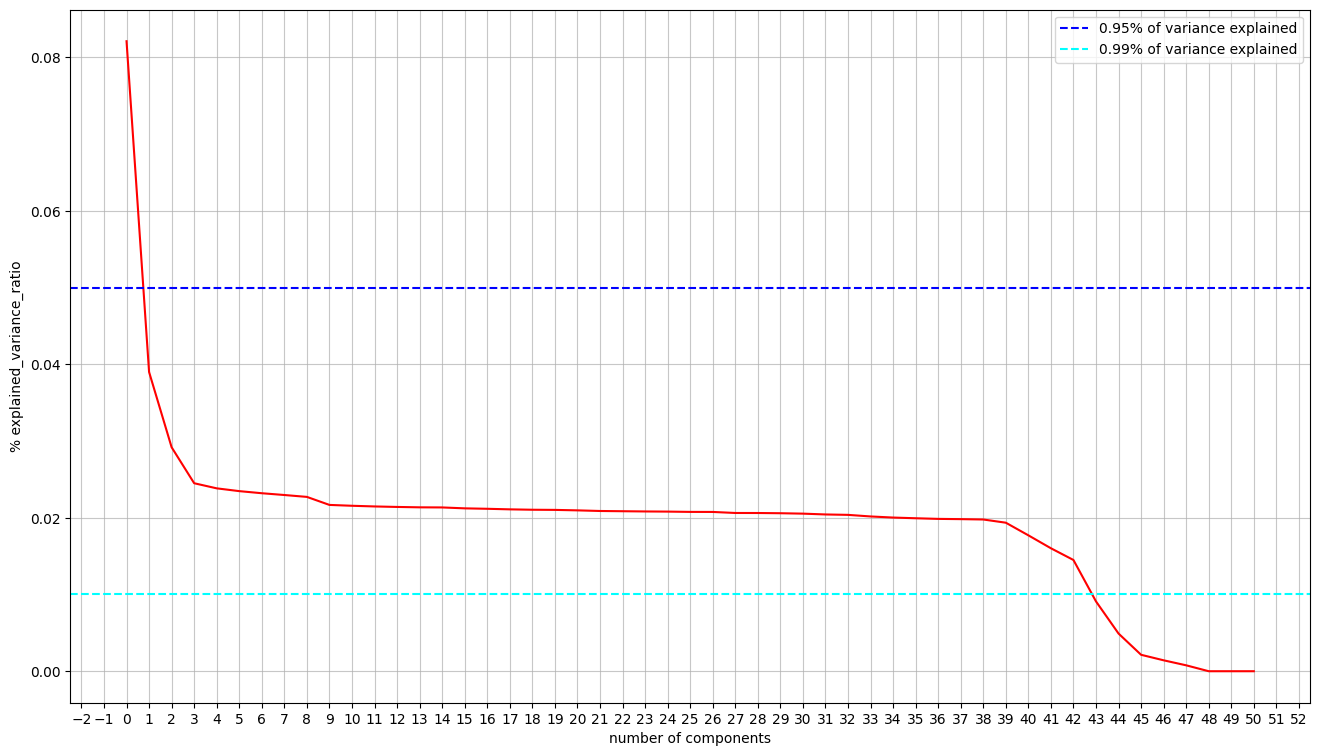

In [26]:
'''
This code block computes the variance of principle components resulting from PCA
'''

number_comp= Cluster_all_ohe.shape[1]
print(Cluster_all_ohe.shape)
pca= PCA(n_components=number_comp, random_state=47)
X_pca = pca.fit(Cluster_all_ohe).transform(Cluster_all_ohe)

total_variance =sum(pca.explained_variance_)
variance95= total_variance * 0.95
print(f"the total variancein our dataset is {total_variance}")
print(f"the 95% of the variance in our dataset is {variance95}")

a=zip(range(0,number_comp), pca.explained_variance_)
a= pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

plt.figure(1, figsize=(16,9))
plt.plot(pca.explained_variance_ratio_, c="r")
tick_step = 1
plt.gca().xaxis.set_major_locator(MultipleLocator(tick_step))
plt.axhline(y=0.05, color='blue', linestyle='--', label='0.95% of variance explained')
plt.axhline(y=0.01, color='cyan', linestyle='--', label='0.99% of variance explained')
plt.grid(True, alpha=0.7)
plt.legend()
plt.xlabel("number of components")
plt.ylabel("% explained_variance_ratio")

## Finding Number of Clusters

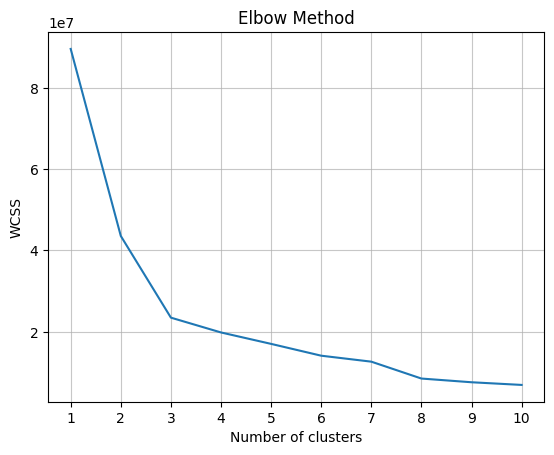

In [27]:
'''
Iterating through possible number of cluster with k-means and obtaining WCSS (Within-Cluster-Sum-of-Squares)
'''
pca= PCA(n_components=2, random_state=47)
X_pca = pca.fit(Cluster_all_ohe).transform(Cluster_all_ohe)

wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
tick_step = 1
plt.gca().xaxis.set_major_locator(MultipleLocator(tick_step))
plt.grid(True, alpha=0.7)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

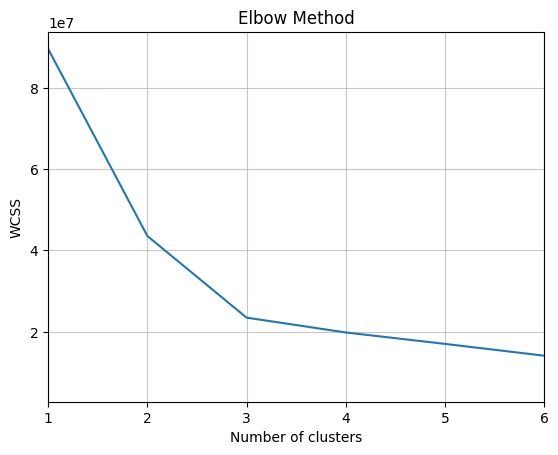

In [28]:
# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
tick_step = 1
plt.gca().xaxis.set_major_locator(MultipleLocator(tick_step))
plt.grid(True, alpha=0.7)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.xlim([1,6])
plt.show()

# Hard Clustering

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=21)
kmeans.fit(X_pca)
labels_hard = kmeans.labels_

KMeans(n_clusters=3, random_state=21)

In [31]:
Cluster_all_knn = Cluster_all.copy()
Cluster_all_knn["clusters"]= labels_hard

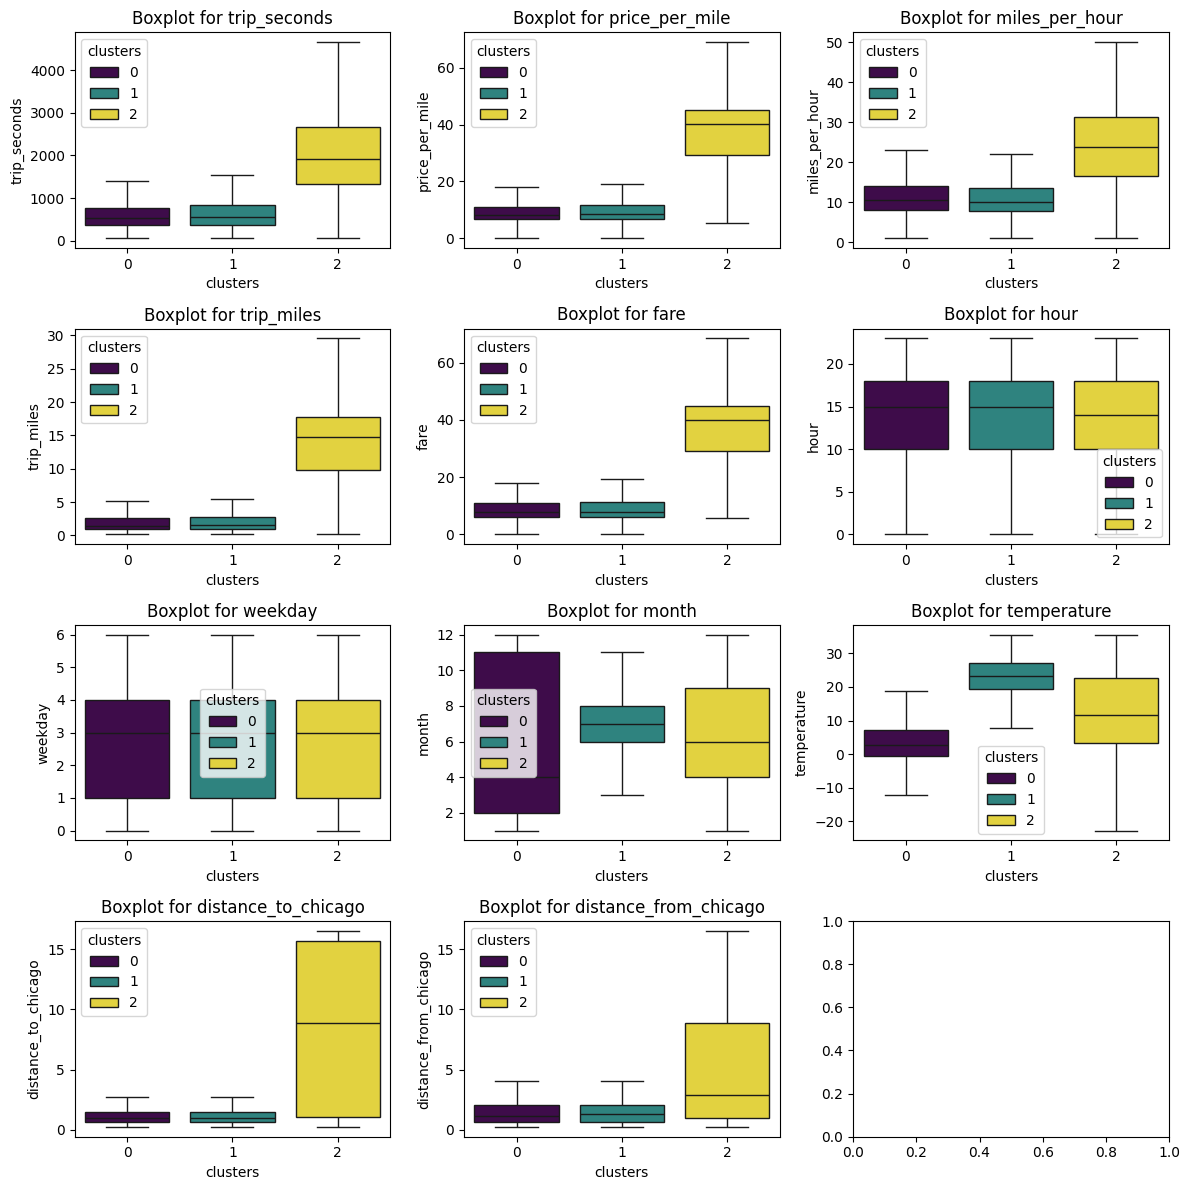

In [32]:
features_hard = features
# Create a 3x3 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through features and create boxplots
for i, feature in enumerate(features_hard):
    
    sns.boxplot(x='clusters', y=feature, data=Cluster_all_knn, hue='clusters', palette='viridis', ax=axes[i], showfliers=False)
    
    # Set subplot title
    axes[i].set_title(f'Boxplot for {feature}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

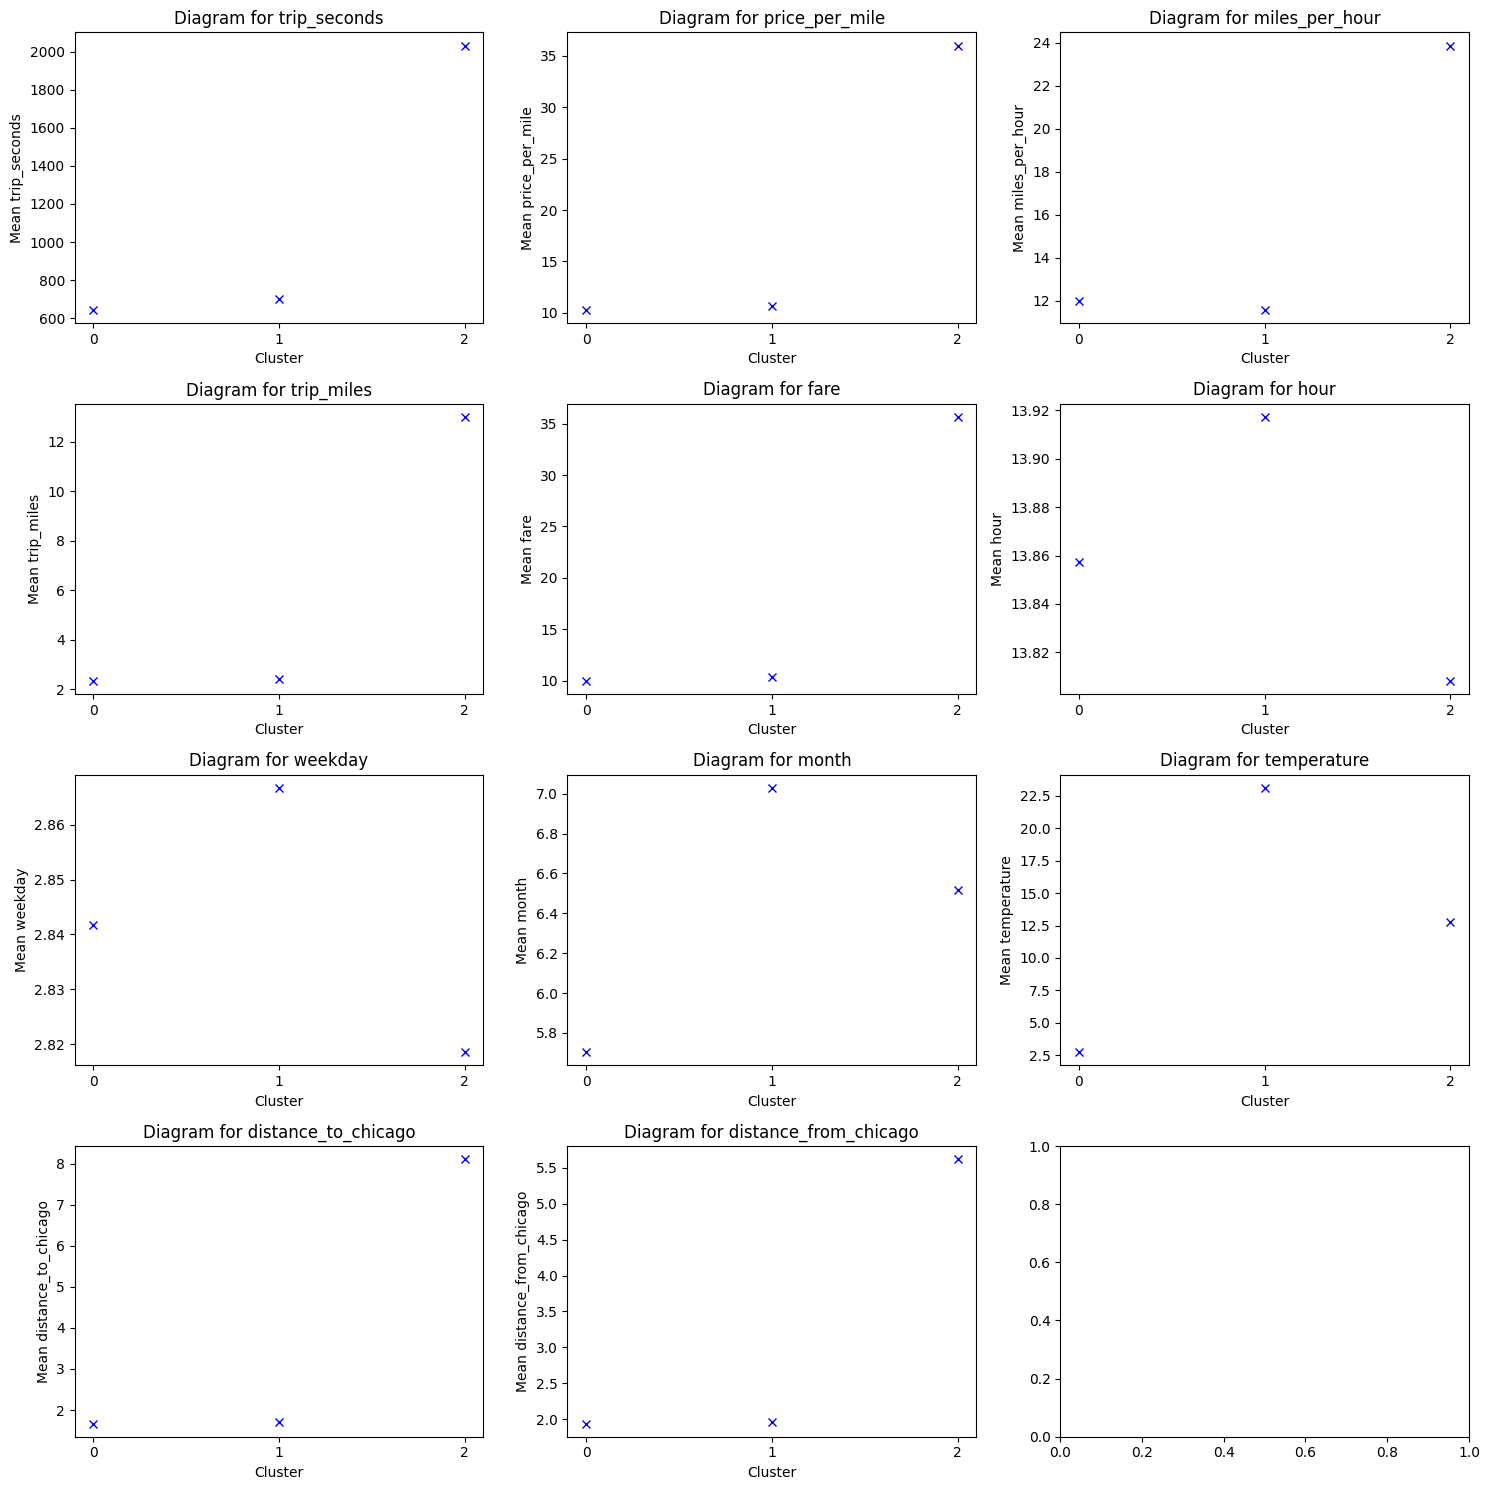

In [33]:
# Features to plot for mean plot
features_hard = features

cluster_centers = Cluster_all_knn.groupby('clusters').mean().reset_index()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

axes = axes.flatten()


for i, feature in enumerate(features_hard):
    axes[i].plot(cluster_centers['clusters'], cluster_centers[feature], marker='x', linestyle='', color='b', label=f'Feature: {feature}')
    
    axes[i].set_title(f'Diagram for {feature}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Mean {feature}')
    axes[i].xaxis.set_major_locator(MultipleLocator(1))

plt.tight_layout()

plt.show()

In [34]:
# Inspect mean values
cluster_centers

clusters  trip_seconds  price_per_mile  miles_per_hour  trip_miles  \
0         0    644.381272       10.302658       11.990880    2.337240   
1         1    700.239123       10.715033       11.588173    2.429995   
2         2   2031.994745       36.009725       23.881482   13.017966   

        fare       hour   weekday     month  temperature  distance_to_chicago  \
0   9.966501  13.857445  2.841664  5.702840     2.738402             1.671649   
1  10.359258  13.917325  2.866688  7.028566    23.090950             1.719937   
2  35.662448  13.808160  2.818508  6.516581    12.734566             8.102775   

   distance_from_chicago  
0               1.938552  
1               1.960753  
2               5.621282

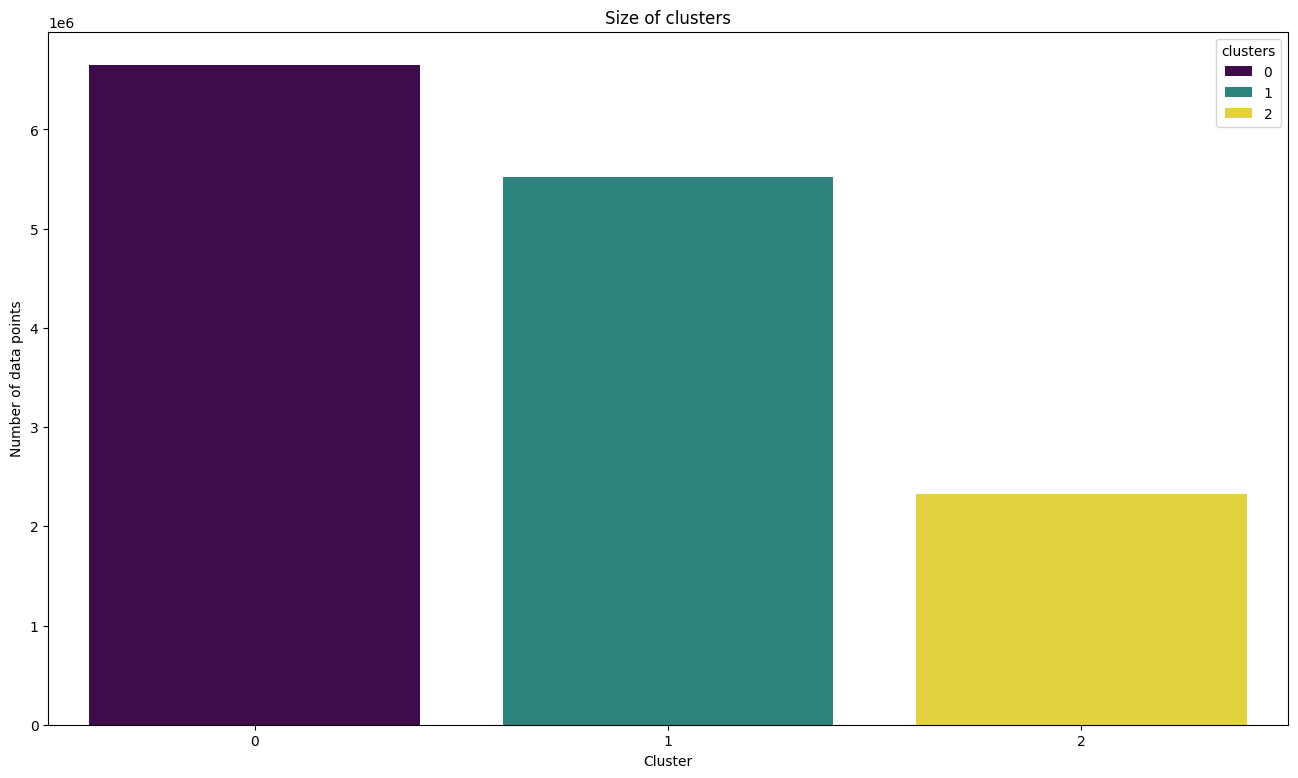

In [35]:
plt.figure(figsize=(16,9))
sns.countplot(data=Cluster_all_knn, x="clusters", hue="clusters", palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of data points')
plt.title('Size of clusters')
plt.show()

In [36]:
cluster_sizes = Cluster_all_knn['clusters'].value_counts()
cluster_sizes

clusters
0    6652108
1    5524415
2    2326714
Name: count, dtype: int64

In [37]:
Cluster_all_knn.describe()

trip_seconds  price_per_mile  miles_per_hour    trip_miles  \
count  1.450324e+07    1.450324e+07    1.450324e+07  1.450324e+07   
mean   8.882690e+02    1.458385e+01    1.374506e+01  4.086050e+00   
std    7.938495e+02    2.133813e+01    8.347205e+00  5.350003e+00   
min    6.100000e+01    1.000000e-02    1.000215e+00  1.600000e-01   
25%    4.020000e+02    7.000000e+00    8.250000e+00  1.000000e+00   
50%    6.030000e+02    9.000000e+00    1.106796e+01  1.690000e+00   
75%    1.027000e+03    1.500000e+01    1.656947e+01  4.000000e+00   
max    7.199000e+03    1.333757e+04    5.000000e+01  4.993000e+01   

               fare          hour       weekday         month   temperature  \
count  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07  1.450324e+07   
mean   1.423843e+01  1.387235e+01  2.847481e+00  6.338367e+00  1.209453e+01   
std    1.974448e+01  5.668963e+00  1.873343e+00  3.336943e+00  1.179568e+01   
min    1.000000e-02  0.000000e+00  0.000000e+00  1.000000e+00 -2.277778e+01   
25%    6.500000e+00  1.000000e+01  1.000000e+00  3.000000e+00  2.222222e+00   
50%    8.500000e+00  1.500000e+01  3.000000e+00  6.000000e+00  1.055556e+01   
75%    1.500000e+01  1.800000e+01  4.000000e+00  9.000000e+00  2.277778e+01   
max    9.250000e+03  2.300000e+01  6.000000e+00  1.200000e+01  3.555556e+01   

       distance_to_chicago  distance_from_chicago      clusters  
count         1.450324e+07           1.450324e+07  1.450324e+07  
mean          2.721770e+00           2.537819e+00  7.017635e-01  
std           4.216270e+00           3.355726e+00  7.281112e-01  
min           2.428785e-01           2.428785e-01  0.000000e+00  
25%           6.570385e-01           6.658070e-01  0.000000e+00  
50%           1.049310e+00           1.292381e+00  1.000000e+00  
75%           1.757563e+00           2.878049e+00  1.000000e+00  
max           1.652549e+01           1.652549e+01  2.000000e+00

In [38]:
# Intervals based on distribution but not directly adopted
# Trip Duration: long, middle, short
Cluster_all_knn['trip_duration_category'] = [
    'short' if x < 300 else 'middle' if x < 1000 else 'long' 
    for x in Cluster_all_knn['trip_seconds']
]

# Price per Mile: expensive, middle, cheap
Cluster_all_knn['price_per_mile_category'] = [
    'cheap' if x < 9.9 else 'middle' if x < 16.0 else 'expensive' 
    for x in Cluster_all_knn['price_per_mile']
]

# Miles per Hour: fast, middle, slow
Cluster_all_knn['miles_per_hour_category'] = [
    'slow' if x < 13 else 'middle' if x < 30 else 'fast' 
    for x in Cluster_all_knn['miles_per_hour']
]

# Trip Miles: long, middle, short
Cluster_all_knn['trip_miles_category'] = [
    'short' if x < 1.2 else 'middle' if x < 3.1 else 'long' 
    for x in Cluster_all_knn['trip_miles']
]

# Hour: night, morning, noon, afternoon, evening
Cluster_all_knn['hour_category'] = [
    'night' if x < 5 else 
    'morning' if x < 11 else 
    'noon' if x < 14 else 
    'afternoon' if x < 17 else 
    'evening'
    for x in Cluster_all_knn['hour']
]

# Weekday: weekday, weekend
Cluster_all_knn['weekday_category'] = [
    'weekend' if day >= 5 else 'weekday' 
    for day in Cluster_all_knn['weekday']
]

# Month: winter, spring, summer, fall
Cluster_all_knn['month_category'] = [
    'winter' if x in [12, 1, 2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'fall' 
    for x in Cluster_all_knn['month']
]

# Temperature: hot, mild, cold
Cluster_all_knn['temperature_category'] = [
    'cold' if x < 4.0 else 'mild' if x < 22.0 else 'hot' 
    for x in Cluster_all_knn['temperature']
]

# Distance to Chicago: near, middle, far
Cluster_all_knn['distance_to_chicago_category'] = [
    'near' if x < 0.7 else 'middle' if x < 3 else 'far' 
    for x in Cluster_all_knn['distance_to_chicago']
]

# Distance from Chicago: near, middle, far
Cluster_all_knn['distance_from_chicago_category'] = [
    'near' if x < 0.7 else 'middle' if x < 3 else 'far' 
    for x in Cluster_all_knn['distance_to_chicago']
]

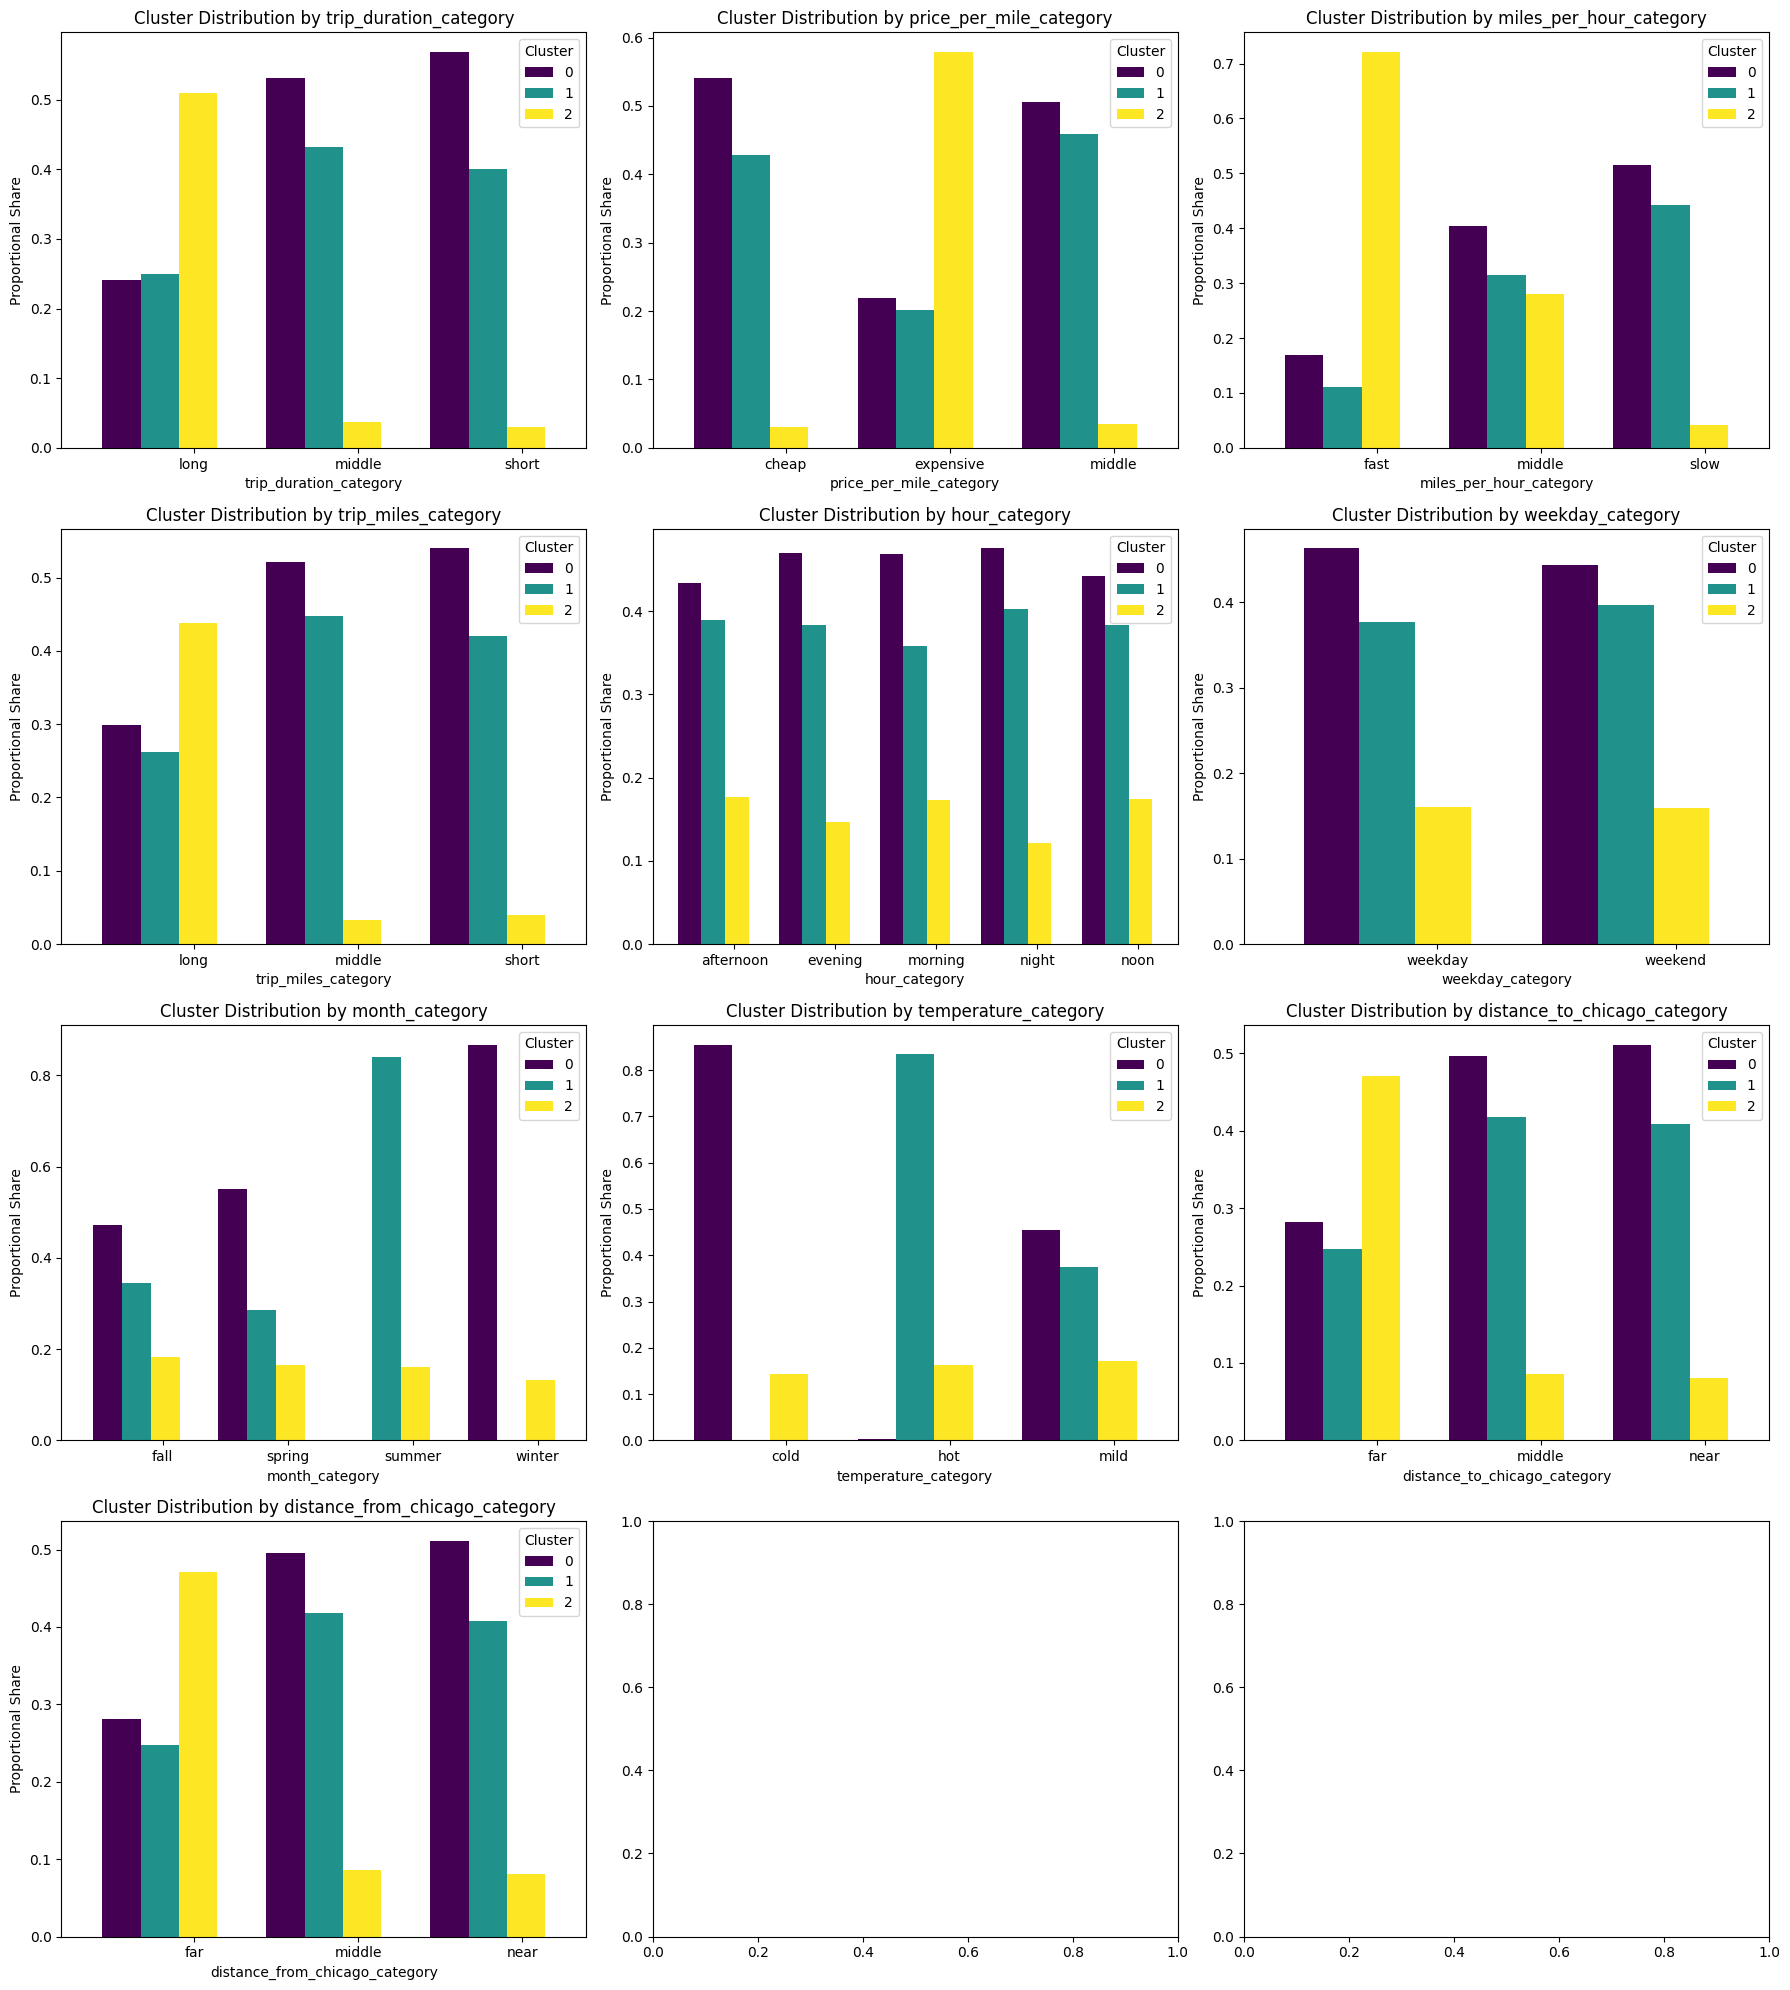

In [39]:
generated_categories = [
    'trip_duration_category',
    'price_per_mile_category',
    'miles_per_hour_category',
    'trip_miles_category',
    'hour_category',
    'weekday_category',
    'month_category',
    'temperature_category',
    'distance_to_chicago_category',
    'distance_from_chicago_category'
]

fig, axes = plt.subplots(4, 3, figsize=(18, 20))

for i, category in enumerate(generated_categories):
    ax = axes[i // 3, i % 3]
    
    cross_tab = pd.crosstab(Cluster_all_knn[category], Cluster_all_knn['clusters'], normalize='index')

    cross_tab.plot(kind='bar', stacked=False, position=0.8, width=0.7, colormap='viridis', ax=ax)
    
    ax.set_title(f'Cluster Distribution by {category}')
    ax.set_xlabel(category)
    ax.set_ylabel('Proportional Share')
    ax.legend(title='Cluster')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Soft Clustering

In [40]:
gmm = GaussianMixture(n_components=3).fit(X_pca)
labels_soft = gmm.predict(X_pca)

In [42]:
Cluster_all_gmm = Cluster_all.copy()
Cluster_all_gmm["clusters"]= labels_soft

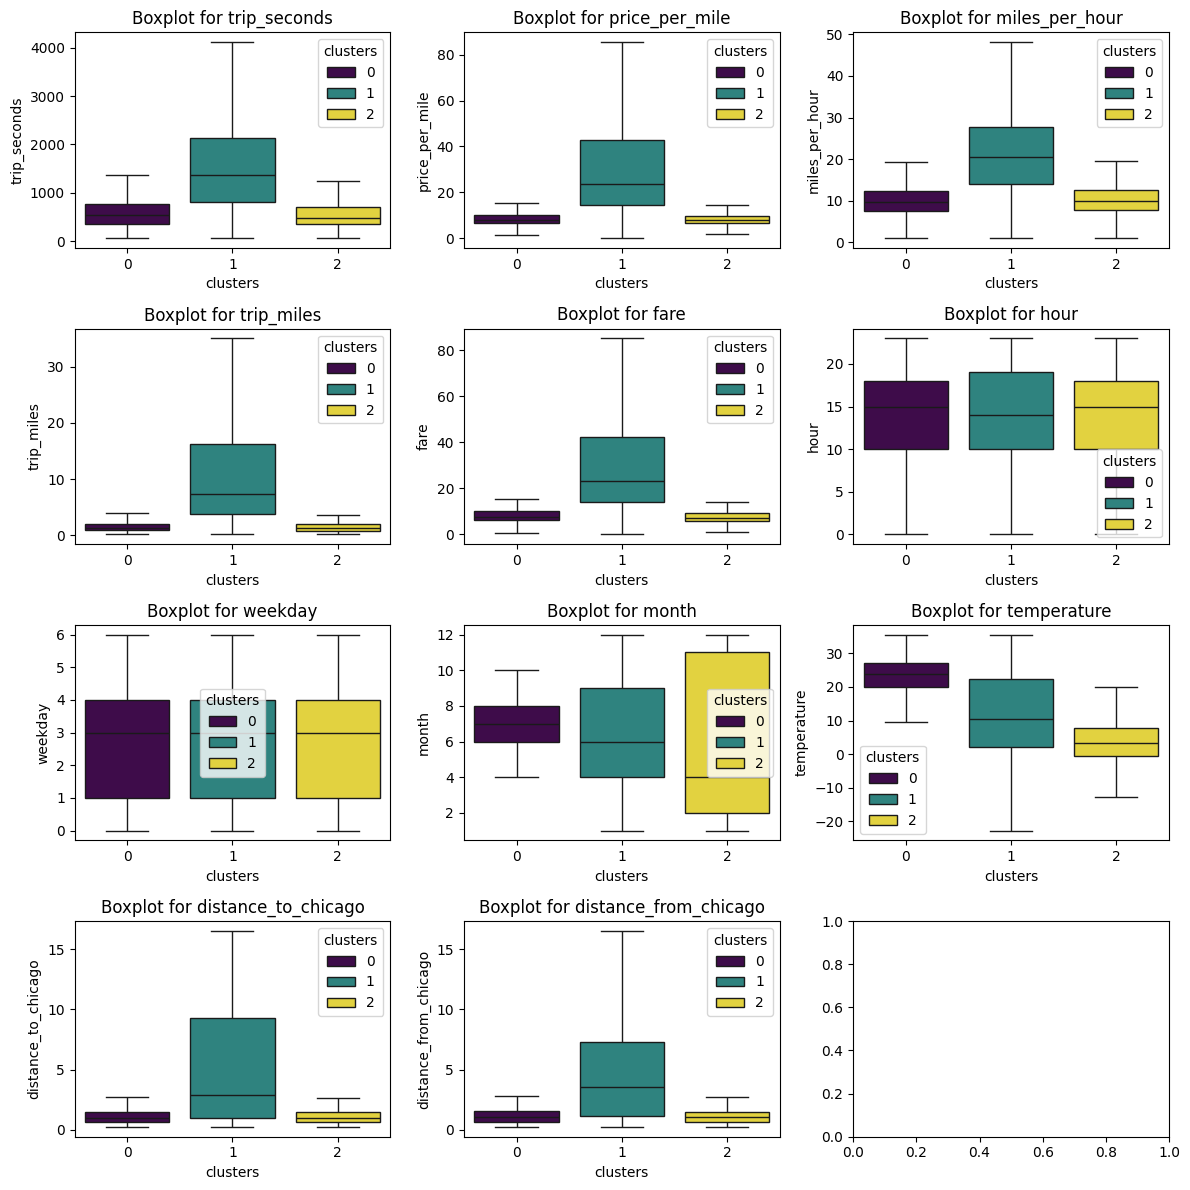

In [43]:
features_soft = features

# Create a 3x3 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through features and create boxplots
for i, feature in enumerate(features_soft):
    
    sns.boxplot(x='clusters', y=feature, data=Cluster_all_gmm, hue='clusters', palette='viridis', ax=axes[i], showfliers=False)
    
    # Set subplot title
    axes[i].set_title(f'Boxplot for {feature}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

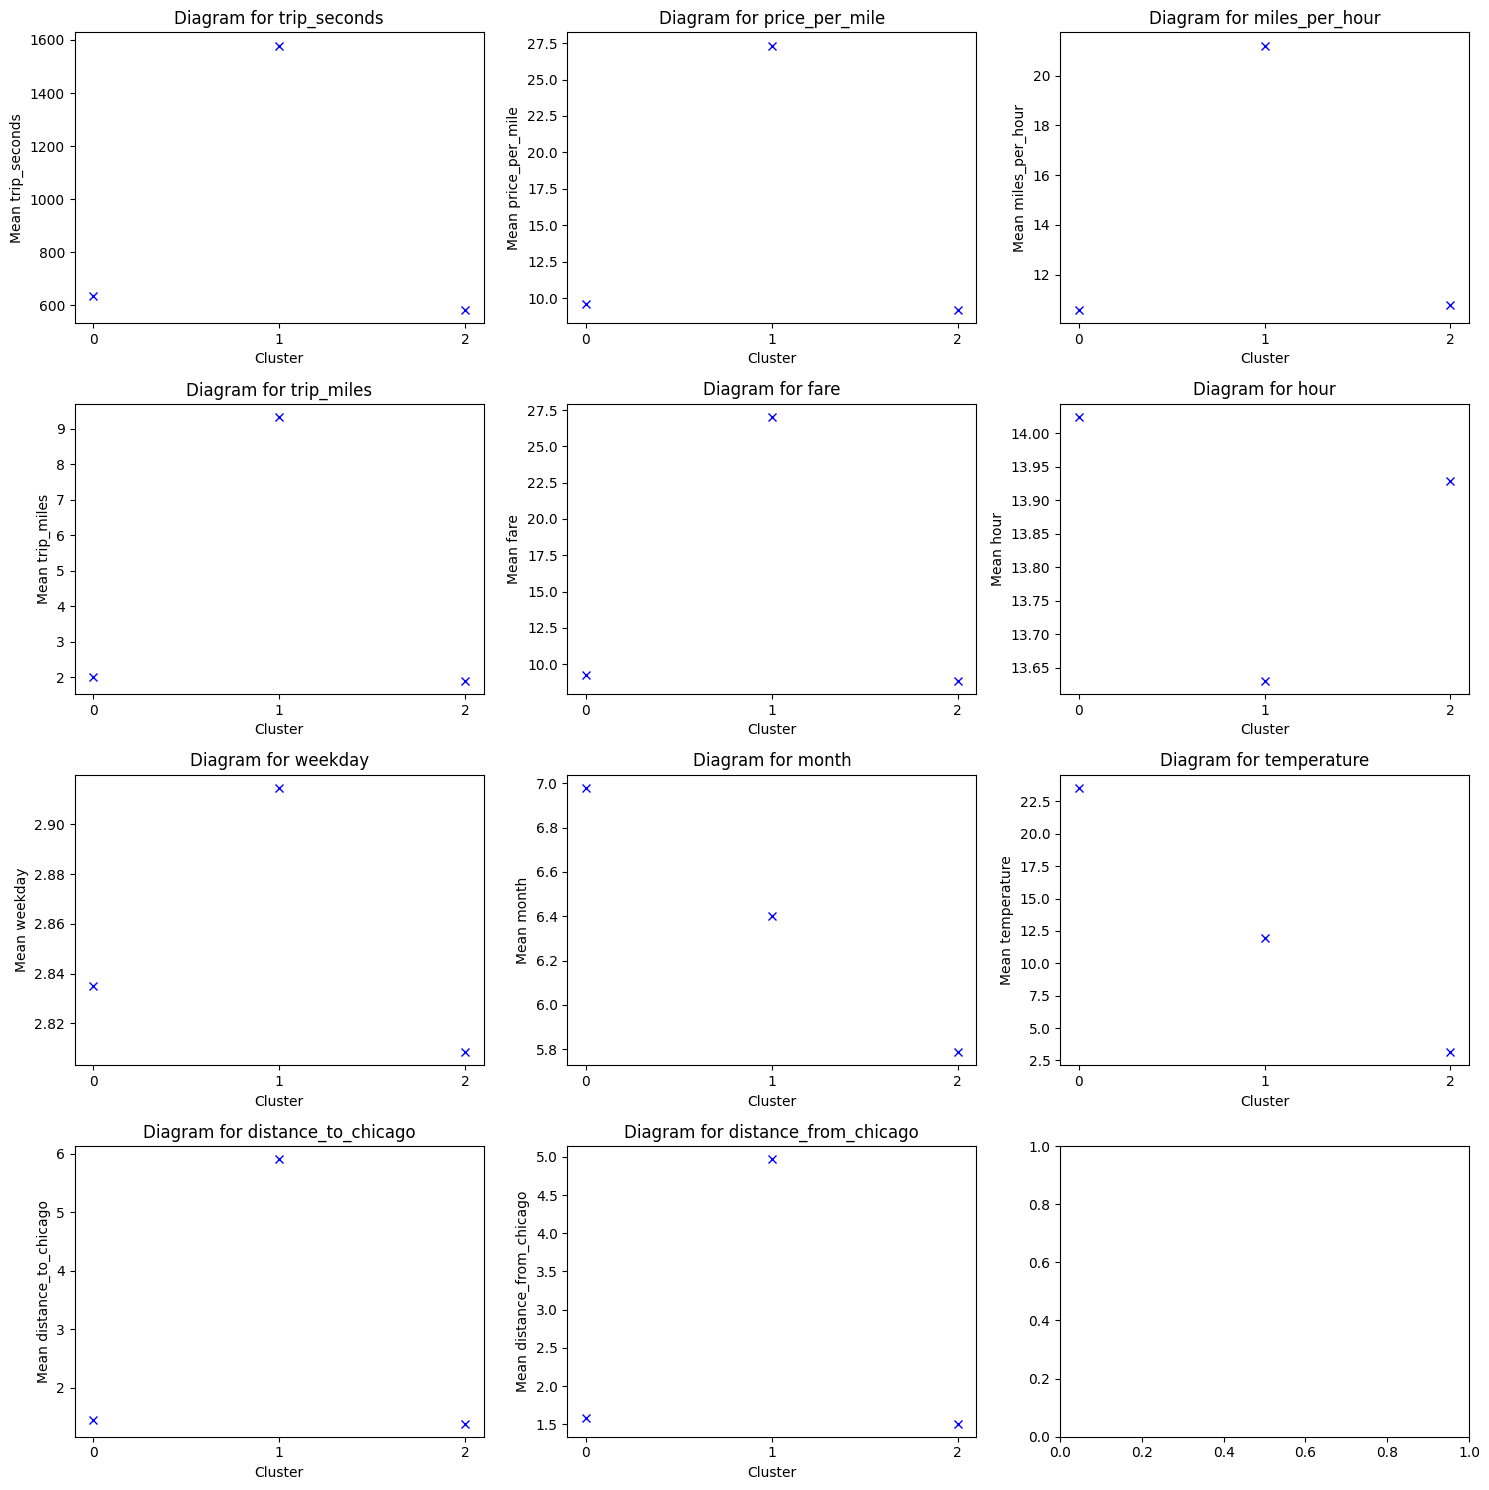

In [44]:
# Features to plot
features_soft = features
cluster_centers = Cluster_all_gmm.groupby('clusters').mean().reset_index()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

axes = axes.flatten()


for i, feature in enumerate(features_hard):
    axes[i].plot(cluster_centers['clusters'], cluster_centers[feature], marker='x', linestyle='', color='b', label=f'Feature: {feature}')
    
    axes[i].set_title(f'Diagram for {feature}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Mean {feature}')
    axes[i].xaxis.set_major_locator(MultipleLocator(1))

plt.tight_layout()

plt.show()

In [45]:
# Inspect mean values
cluster_centers

clusters  trip_seconds  price_per_mile  miles_per_hour  trip_miles  \
0         0    634.221372        9.599487       10.592342    2.003662   
1         1   1579.040052       27.336408       21.204218    9.333034   
2         2    583.798292        9.196105       10.781716    1.894323   

        fare       hour   weekday     month  temperature  distance_to_chicago  \
0   9.225109  14.024904  2.834852  6.978058    23.525095             1.454281   
1  27.041411  13.629946  2.914531  6.399675    11.962451             5.908931   
2   8.836728  13.928947  2.808394  5.786611     3.134044             1.392507   

   distance_from_chicago  
0               1.588147  
1               4.967192  
2               1.511566

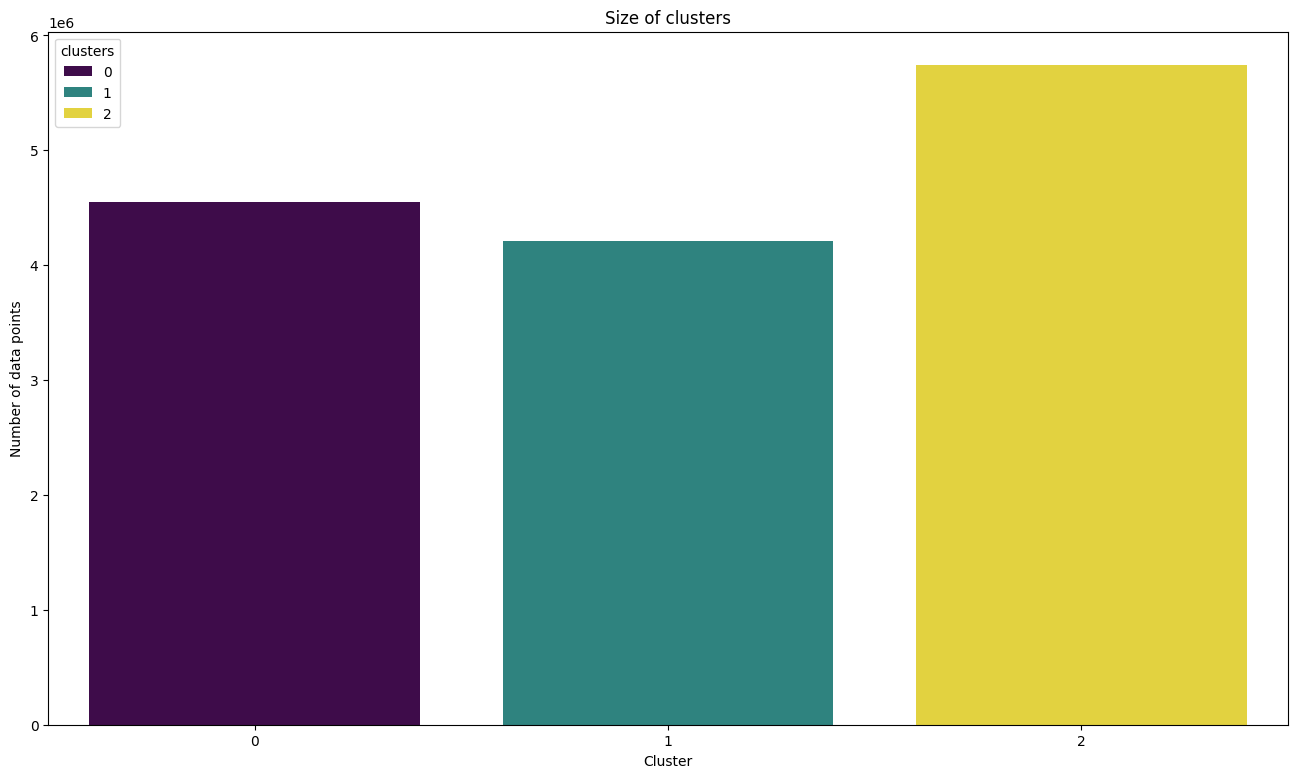

In [46]:
plt.figure(figsize=(16,9))
sns.countplot(data=Cluster_all_gmm, x="clusters", hue="clusters", palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of data points')
plt.title('Size of clusters')
plt.show()

In [47]:
cluster_sizes = Cluster_all_gmm['clusters'].value_counts()
print(cluster_sizes)

clusters
2    5744887
0    4552053
1    4206297
Name: count, dtype: int64


In [48]:
# Trip Duration: long, middle, short
Cluster_all_gmm['trip_duration_category'] = [
    'short' if x < 300 else 'middle' if x < 1000 else 'long' 
    for x in Cluster_all_gmm['trip_seconds']
]

# Price per Mile: expensive, middle, cheap
Cluster_all_gmm['price_per_mile_category'] = [
    'cheap' if x < 9.9 else 'middle' if x < 16.0 else 'expensive' 
    for x in Cluster_all_gmm['price_per_mile']
]

# Miles per Hour: fast, middle, slow
Cluster_all_gmm['miles_per_hour_category'] = [
    'slow' if x < 13 else 'middle' if x < 30 else 'fast' 
    for x in Cluster_all_gmm['miles_per_hour']
]

# Trip Miles: long, middle, short
Cluster_all_gmm['trip_miles_category'] = [
    'short' if x < 1.2 else 'middle' if x < 3.1 else 'long' 
    for x in Cluster_all_gmm['trip_miles']
]

# Hour: night, morning, noon, afternoon, evening
Cluster_all_gmm['hour_category'] = [
    'night' if x < 5 else 
    'morning' if x < 11 else 
    'noon' if x < 14 else 
    'afternoon' if x < 17 else 
    'evening'
    for x in Cluster_all_gmm['hour']
]

# Weekday: weekday, weekend
Cluster_all_gmm['weekday_category'] = [
    'weekend' if day >= 5 else 'weekday' 
    for day in Cluster_all_gmm['weekday']
]

# Month: winter, spring, summer, fall (USA)
Cluster_all_gmm['month_category'] = [
    'winter' if x in [12, 1, 2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'fall' 
    for x in Cluster_all_gmm['month']
]

# Temperature: hot, mild, cold
Cluster_all_gmm['temperature_category'] = [
    'cold' if x < 4.0 else 'mild' if x < 22.0 else 'hot' 
    for x in Cluster_all_gmm['temperature']
]

# Distance to Chicago: near, middle, far
Cluster_all_gmm['distance_to_chicago_category'] = [
    'near' if x < 0.7 else 'middle' if x < 3 else 'far' 
    for x in Cluster_all_gmm['distance_to_chicago']
]

# Distance from Chicago: near, middle, far
Cluster_all_gmm['distance_from_chicago_category'] = [
    'near' if x < 0.7 else 'middle' if x < 3 else 'far' 
    for x in Cluster_all_gmm['distance_to_chicago']
]

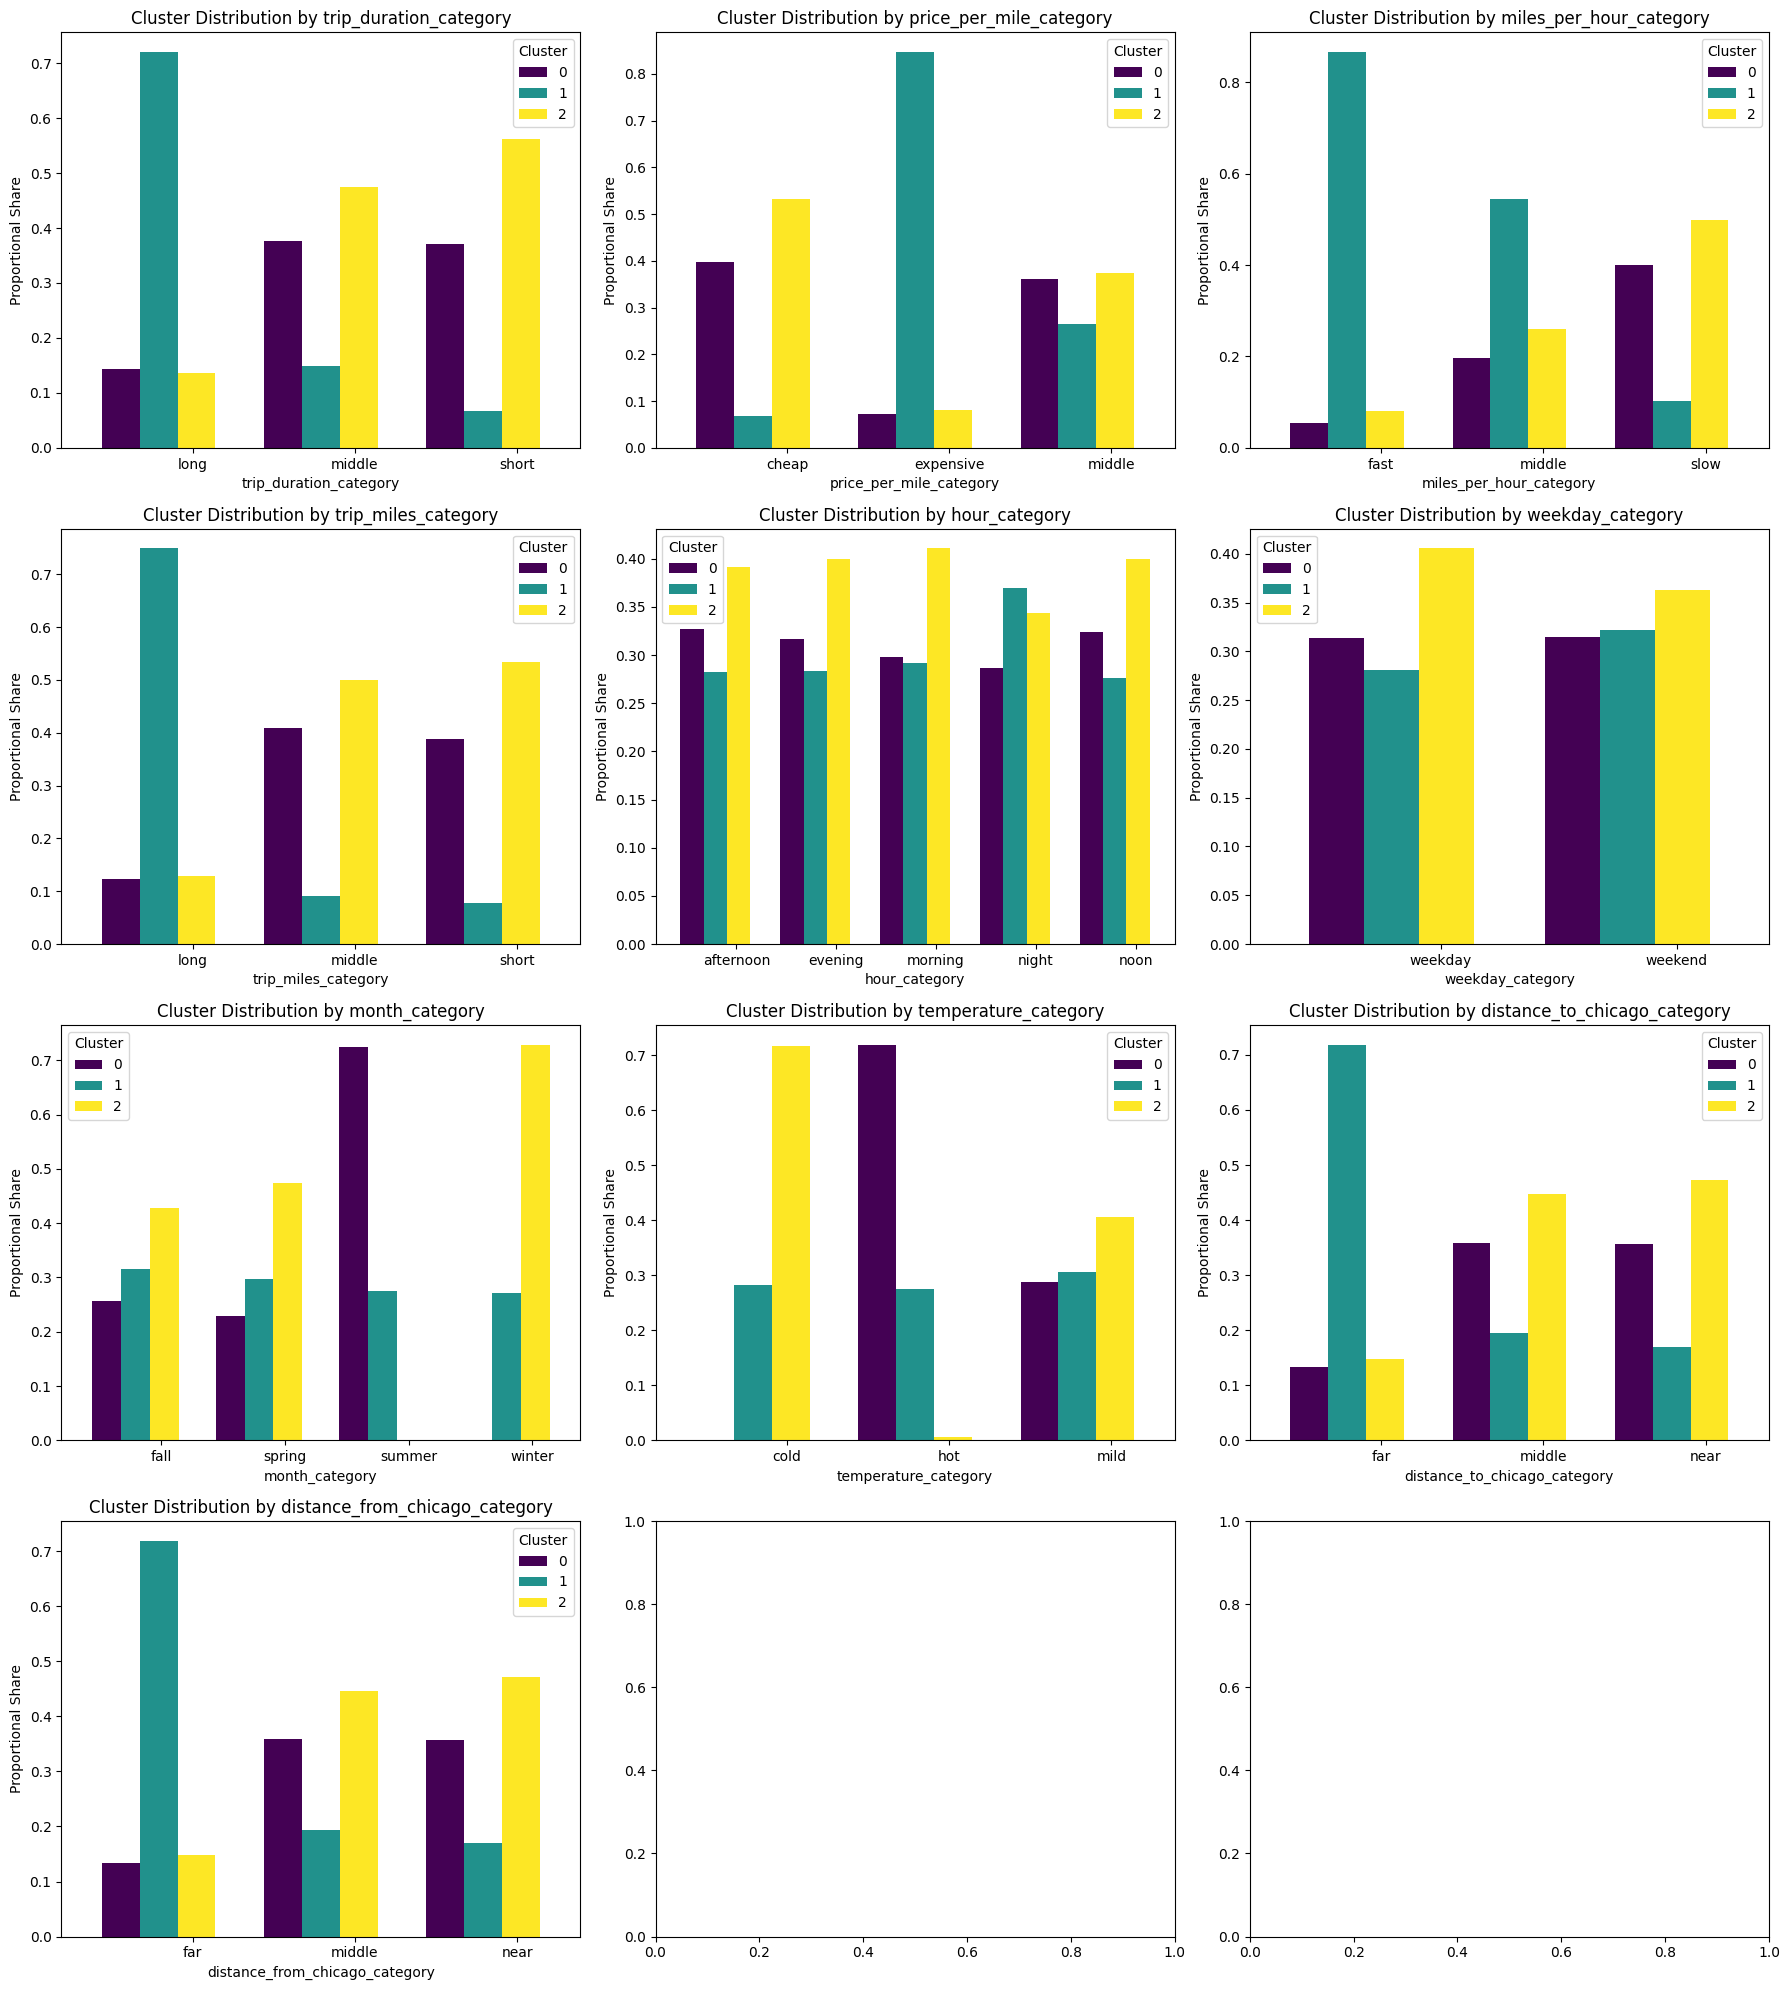

In [49]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))

for i, category in enumerate(generated_categories):
    ax = axes[i // 3, i % 3]
    
    cross_tab = pd.crosstab(Cluster_all_gmm[category], Cluster_all_gmm['clusters'], normalize='index')
    
    cross_tab.plot(kind='bar', stacked=False, position=0.8, width=0.7, colormap='viridis', ax=ax)

    ax.set_title(f'Cluster Distribution by {category}')
    ax.set_xlabel(category)
    ax.set_ylabel('Proportional Share')
    ax.legend(title='Cluster')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# Spatial Kernel Density Estimation

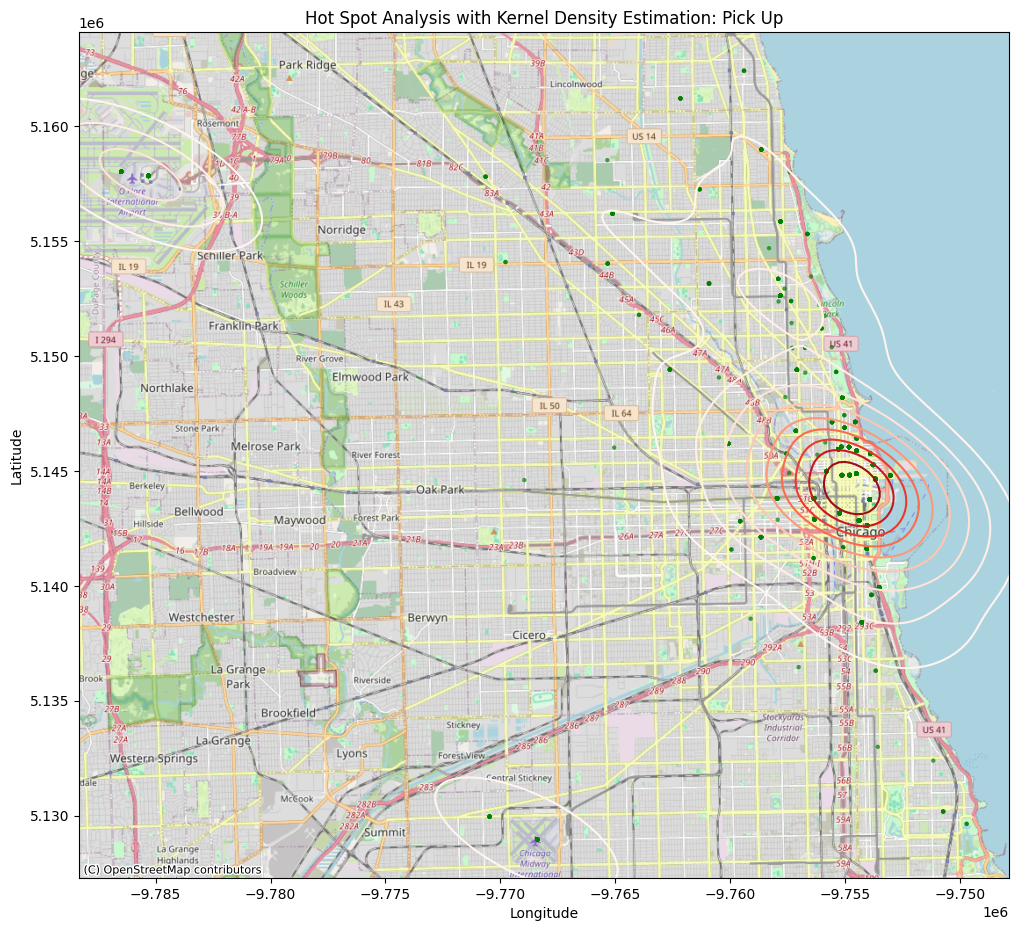

In [50]:
bw_adjust = 1

# Sampling due to computational resources
data = data.sample(n=2000, random_state=42)

gdf = gpd.GeoDataFrame(
    data,
    geometry=[Point(lon, lat) for lon, lat in zip(data['pickup_longitude'], data['pickup_latitude'])],
    crs="EPSG:4326"  # Data locates in a WGS84 Coordinate System
)

# Need to convert the GeoDataFrame to EPSG:3857 for the basemap
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))

gdf.plot(ax=ax, color='green', markersize=10, alpha=0.7, edgecolor='none')

ctx.add_basemap(ax, crs='EPSG:3857', zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

# Gaussian kernel is default
sns.kdeplot(
    x=gdf.geometry.x, 
    y=gdf.geometry.y, 
    cmap="Reds", 
    bw_adjust=bw_adjust, 
    ax=ax,
    fill=False
)

ax.set_title('Hot Spot Analysis with Kernel Density Estimation: Pick Up')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')

plt.show()

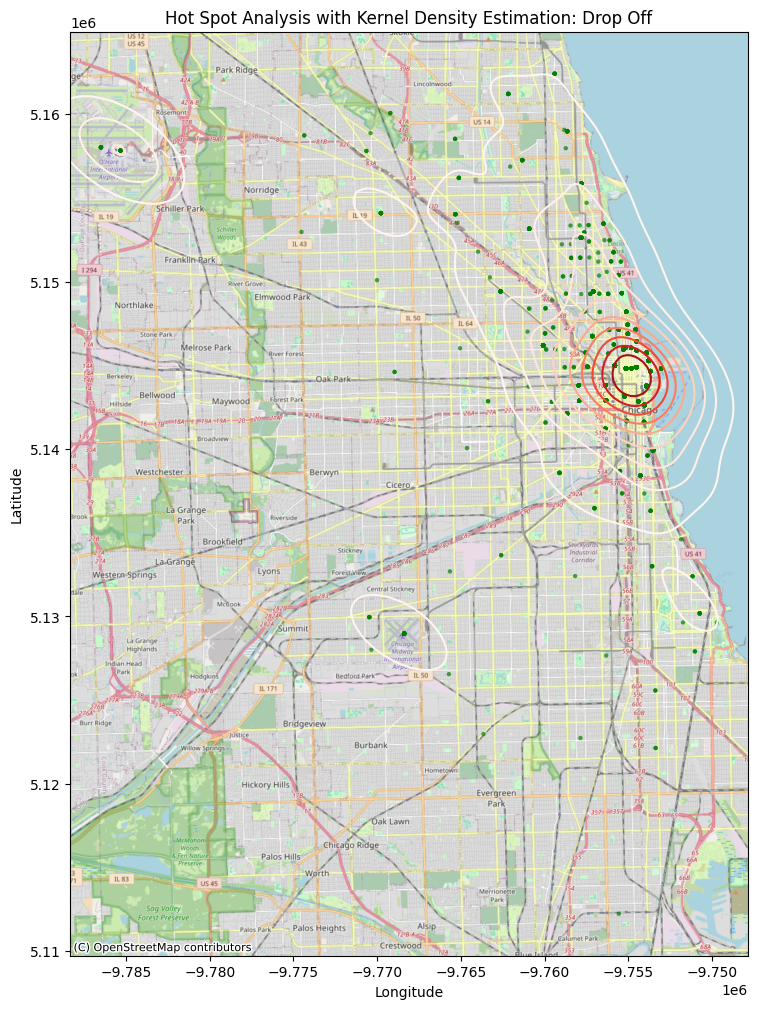

In [51]:
gdf = gpd.GeoDataFrame(
    data,
    geometry=[Point(lon, lat) for lon, lat in zip(data['dropoff_longitude'], data['dropoff_latitude'])],
    crs="EPSG:4326"
)

gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))

gdf.plot(ax=ax, color='green', markersize=10, alpha=0.7, edgecolor='none')

ctx.add_basemap(ax, crs='EPSG:3857', zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

sns.kdeplot(
    x=gdf.geometry.x, 
    y=gdf.geometry.y, 
    cmap="Reds", 
    bw_adjust=bw_adjust, 
    ax=ax,
    fill=False
)

ax.set_title('Hot Spot Analysis with Kernel Density Estimation: Drop Off')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')

plt.show()